# Cluster 2: Average Profit and Loss per Study

This cluster [what it is]

## Importing Relevant Packages and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from functions import *

In [2]:
win_95 = pd.DataFrame(pd.read_csv('../data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('../data/lo_95.csv'))
index_95 = pd.DataFrame(pd.read_csv('../data/index_95.csv'))

index_100 = pd.DataFrame(pd.read_csv('../data/index_100.csv'))
win_100 = pd.DataFrame(pd.read_csv('../data/wi_100.csv'))
loss_100 = pd.DataFrame(pd.read_csv('../data/lo_100.csv'))

index_150 = pd.DataFrame(pd.read_csv('../data/index_150.csv'))
win_150 = pd.DataFrame(pd.read_csv('../data/wi_150.csv'))
loss_150 = pd.DataFrame(pd.read_csv('../data/lo_150.csv'))

## Creating Separate Datasets per Study

In [3]:
study_fridberg = index_95
study_hortsmann = index_100.iloc[:162]
study_kjome = index_100.iloc[162:181]
study_maia = index_100.iloc[181:221]
study_steingrover_inprep = index_100.iloc[221:291]
study_premkumar = index_100.iloc[291:316]
study_wood = index_100.iloc[316:469]
study_worthy = index_100.iloc[469:]
study_steingrover_2011 = index_150.iloc[:57]
study_wetzels = index_150.iloc[57:]

In [4]:
win_fridberg = win_95
win_hortsmann = win_100.iloc[:162]
win_kjome = win_100.iloc[162:181]
win_maia = win_100.iloc[181:221]
win_steingrover_inprep = win_100.iloc[221:291]
win_premkumar = win_100.iloc[291:316]
win_wood = win_100.iloc[316:469]
win_worthy = win_100.iloc[469:]
win_steingrover_2011 = win_150.iloc[:57]
win_wetzels = win_150.iloc[57:]

In [5]:
loss_fridberg = loss_95
loss_hortsmann = loss_100.iloc[:162]
loss_kjome = loss_100.iloc[162:181]
loss_maia = loss_100.iloc[181:221]
loss_steingrover_inprep = loss_100.iloc[221:291]
loss_premkumar = loss_100.iloc[291:316]
loss_wood = loss_100.iloc[316:469]
loss_worthy = loss_100.iloc[469:]
loss_steingrover_2011 = loss_150.iloc[:57]
loss_wetzels = loss_150.iloc[57:]

These datasets were created manually by checking the structure of each dataset and the studies contained within them.

## Creating Arrays to be Clustered

In [6]:
win_loss_datasets = [[win_fridberg, loss_fridberg],
                    [win_hortsmann, loss_hortsmann],
                    [win_kjome, loss_kjome],
                    [win_maia, loss_maia],
                    [win_steingrover_inprep, loss_steingrover_inprep],
                    [win_premkumar, loss_premkumar],
                    [win_wood, loss_wood],
                    [win_worthy, loss_worthy],
                    [win_steingrover_2011, loss_steingrover_2011],
                    [win_wetzels, loss_wetzels]]

In [7]:
profit_and_loss = []
for dataset_pair in win_loss_datasets:
    profit_and_loss = create_avg_profit_loss_list(dataset_pair, profit_and_loss)

## Plotting the data by Profits and Losses and identifying Clusters

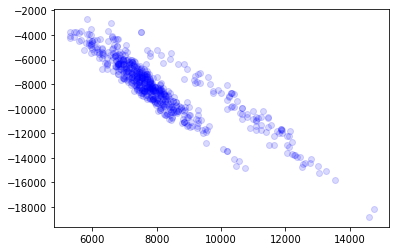

In [8]:
cluster_array = np.array(profit_and_loss)

plt.scatter(
   cluster_array[:, 0], cluster_array[:, 1],
   c='blue', alpha = 0.15
)

In [9]:
kmeans = KMeans(
    n_clusters=10, init='random',
    n_init=1, max_iter = 300,
)

y_km = kmeans.fit_predict(cluster_array)

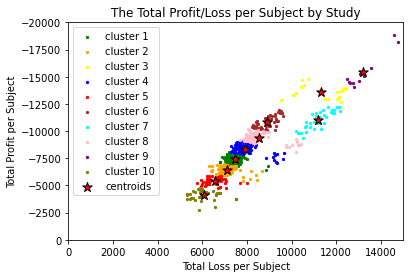

In [10]:
plt.scatter(
    cluster_array[y_km == 0, 0], cluster_array[y_km == 0, 1],
    s=5, c='green',
    marker='o',
    label='cluster 1'
)

plt.scatter(
    cluster_array[y_km == 1, 0], cluster_array[y_km == 1, 1],
    s=5, c='orange',
    marker='o',
    label='cluster 2'
)

plt.scatter(
    cluster_array[y_km == 2, 0], cluster_array[y_km == 2, 1],
    s=5, c='yellow',
    marker='o',
    label='cluster 3'
)

plt.scatter(
    cluster_array[y_km == 3, 0], cluster_array[y_km == 3, 1],
    s=5, c='blue',
    marker='o',
    label='cluster 4'
)

plt.scatter(
    cluster_array[y_km == 4, 0], cluster_array[y_km == 4, 1],
    s=5, c='red',
    marker='o',
    label='cluster 5'
)

plt.scatter(
    cluster_array[y_km == 5, 0], cluster_array[y_km == 5, 1],
    s=5, c='brown',
    marker='o',
    label='cluster 6'
)

plt.scatter(
    cluster_array[y_km == 6, 0], cluster_array[y_km == 6, 1],
    s=5, c='cyan',
    marker='o',
    label='cluster 7'
)

plt.scatter(
    cluster_array[y_km == 7, 0], cluster_array[y_km == 7, 1],
    s=5, c='pink',
    label='cluster 8'
)

plt.scatter(
    cluster_array[y_km == 8, 0], cluster_array[y_km == 8, 1],
    s=5, c='purple',
    label='cluster 9'
)

plt.scatter(
    cluster_array[y_km == 9, 0], cluster_array[y_km == 9, 1],
    s=5, c='olive',
    label='cluster 10'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=100, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("The Total Profit/Loss per Subject by Study")
plt.xlabel("Total Loss per Subject")
plt.ylabel("Total Profit per Subject")
plt.xlim(0,15000)
plt.ylim(0,-20000)
plt.legend(scatterpoints=1)

## Creating Data that represents the average profit and loss per choice

In [11]:
avg_profit_and_loss_per_choice = []
for dataset_pair in win_loss_datasets:
    avg_profit_and_loss_per_choice = create_avg_profit_loss__per_choice_list(dataset_pair, avg_profit_and_loss_per_choice)

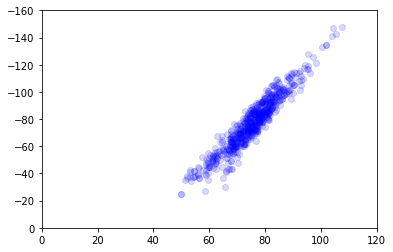

In [12]:
cluster2_array = np.array(avg_profit_and_loss_per_choice)

plt.scatter(
   cluster2_array[:, 0], cluster2_array[:, 1],
   c='blue', alpha = 0.15
)
plt.ylim(0,-160)
plt.xlim(0,120)
plt.show()

In [13]:
kmeans2 = KMeans(
    n_clusters=10, init='random',
    n_init=1, max_iter = 300,
)

y_km2 = kmeans.fit_predict(cluster2_array)

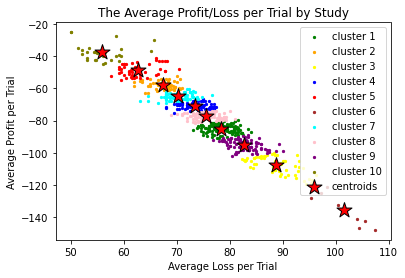

In [14]:
plt.scatter(
    cluster2_array[y_km2 == 0, 0], cluster2_array[y_km2 == 0, 1],
    s=5, c='green',
    marker='o',
    label='cluster 1'
)

plt.scatter(
    cluster2_array[y_km2 == 1, 0], cluster2_array[y_km2 == 1, 1],
    s=5, c='orange',
    marker='o',
    label='cluster 2'
)

plt.scatter(
    cluster2_array[y_km2 == 2, 0], cluster2_array[y_km2 == 2, 1],
    s=5, c='yellow',
    marker='o',
    label='cluster 3'
)

plt.scatter(
    cluster2_array[y_km2 == 3, 0], cluster2_array[y_km2 == 3, 1],
    s=5, c='blue',
    marker='o',
    label='cluster 4'
)

plt.scatter(
    cluster2_array[y_km2 == 4, 0], cluster2_array[y_km2 == 4, 1],
    s=5, c='red',
    marker='o',
    label='cluster 5'
)

plt.scatter(
    cluster2_array[y_km2 == 5, 0], cluster2_array[y_km2 == 5, 1],
    s=5, c='brown',
    marker='o',
    label='cluster 6'
)

plt.scatter(
    cluster2_array[y_km2 == 6, 0], cluster2_array[y_km2 == 6, 1],
    s=5, c='cyan',
    marker='o',
    label='cluster 7'
)

plt.scatter(
    cluster2_array[y_km2 == 7, 0], cluster2_array[y_km2 == 7, 1],
    s=5, c='pink',
    label='cluster 8'
)

plt.scatter(
    cluster2_array[y_km2 == 8, 0], cluster2_array[y_km2 == 8, 1],
    s=5, c='purple',
    label='cluster 9'
)

plt.scatter(
    cluster2_array[y_km2 == 9, 0], cluster2_array[y_km2 == 9, 1],
    s=5, c='olive',
    label='cluster 10'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("The Average Profit/Loss per Trial by Study")
plt.xlabel("Average Loss per Trial")
plt.ylabel("Average Profit per Trial")
plt.legend(scatterpoints=1)

## Plotting the same data points by Study

In [15]:
study_datasets = [study_fridberg, study_hortsmann,
                 study_kjome, study_maia, 
                 study_steingrover_inprep, study_premkumar, 
                 study_wood, study_worthy, 
                 study_steingrover_2011, study_wetzels]

study_list = []
for dataset in study_datasets:
    for study in dataset.iloc[:,1]:
        study_list.append(study)
study_array = np.array(study_list)

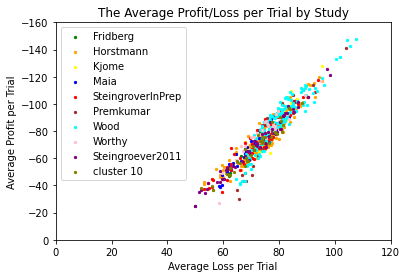

In [16]:
plt.scatter(
    cluster2_array[study_array == 'Fridberg',0], cluster2_array[study_array == 'Fridberg',1],
    s=5, c='green',
    marker='o',
    label='Fridberg'
)

plt.scatter(
    cluster2_array[study_array == 'Horstmann',0], cluster2_array[study_array == 'Horstmann',1],
    s=5, c='orange',
    marker='o',
    label='Horstmann'
)

plt.scatter(
    cluster2_array[study_array == 'Kjome',0], cluster2_array[study_array == 'Kjome',1],
    s=5, c='yellow',
    marker='o',
    label='Kjome'
)

plt.scatter(
    cluster2_array[study_array == 'Maia',0], cluster2_array[study_array == 'Maia',1],
    s=5, c='blue',
    marker='o',
    label='Maia'
)

plt.scatter(
    cluster2_array[study_array == 'SteingroverInPrep',0], cluster2_array[study_array == 'SteingroverInPrep',1],
    s=5, c='red',
    marker='o',
    label='SteingroverInPrep'
)

plt.scatter(
    cluster2_array[study_array == 'Premkumar',0], cluster2_array[study_array == 'Premkumar',1],
    s=5, c='brown',
    marker='o',
    label='Premkumar'
)

plt.scatter(
    cluster2_array[study_array == 'Wood',0], cluster2_array[study_array == 'Wood',1],
    s=5, c='cyan',
    marker='o',
    label='Wood'
)

plt.scatter(
    cluster2_array[study_array == 'Worthy',0], cluster2_array[study_array == 'Worthy',1],
    s=5, c='pink',
    label='Worthy'
)

plt.scatter(
    cluster2_array[study_array == 'Steingroever2011',0], cluster2_array[study_array == 'Steingroever2011',1],
    s=5, c='purple',
    label='Steingroever2011'
)

plt.scatter(
    cluster2_array[study_array == 'Wetzels',0], cluster2_array[study_array == 'Wetzels',1],
    s=5, c='olive',
    label='cluster 10'
)


plt.title("The Average Profit/Loss per Trial by Study")
plt.xlabel("Average Loss per Trial")
plt.ylabel("Average Profit per Trial")
plt.xlim(0,120)
plt.ylim(0,-160)
plt.legend(scatterpoints=1)